In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from datetime import datetime
import dynetx as dn
from tqdm import tqdm
import pickle
import csv

In [2]:
import scipy.stats as sp
import matplotlib.pyplot as plt 
import networkx.algorithms.community as nxcom
import scipy
import powerlaw
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
from NEMtropy import matrix_generator
import os
import re
from os import path
import matplotlib.ticker as ticker

## Step1: Load the dictionary of the networks, or LCC networks by days for calculation

In [3]:
with open('Network_dict.pkl', 'rb') as fp:
    Network = pickle.load(fp)

In [ ]:
G=Network['2021-11-25']

In [ ]:
Network_list=[]

## Step2: Simple visualization for the community

In [ ]:
def Easy_Draw(G):
    pos = nx.spring_layout(G, seed=6300) 
    d = dict(G.degree)
    colors = range(380)
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    nx.draw(G,  node_color=range(181), edgelist=edges, edge_color=norm, node_size=[v * 10 for v in d.values()], cmap=plt.cm.Blues,edge_cmap=plt.cm.Blues)
    plt.show()
    

In [ ]:
pos = nx.nx_agraph.graphviz_layout(S[0], prog="neato")
#pos = nx.nx_agraph.graphviz_layout(S[0], prog="neato", args="")
#pos = nx.kamada_kawai_layout(S[0])
d = dict(S[0].degree)
weights = nx.get_edge_attributes(S[0],'weight')

nx.draw(S[0], pos=pos, node_color=[v * 10 for v in d.values()], width=1.0, edge_color=weights.values(), node_size=[v * 10 for v in d.values()], 
        vmin=1,vmax=100,cmap=plt.cm.Blues,edge_cmap=plt.cm.Blues,edge_vmin=1,edge_vmax=1000000)
plt.show()

In [ ]:
pos = nx.spring_layout(S[0], seed=63) 
d = dict(S[0].degree)
weights = nx.get_edge_attributes(S[0],'weight')

nx.draw(S[0], pos=pos, node_color=range(181), edgelist=edges,width=1.0, edge_color=weights.values(), node_size=[v * 10 for v in d.values()], cmap=plt.cm.Blues,edge_cmap=plt.cm.Blues,edge_vmin=1,edge_vmax=100000)
plt.show()

dot,
neato,
fdp,
sfdp,
circo,
twopi,
nop,
nop2,
osage,
patchwork,
Writing Layout Plugins

In [ ]:
def Layer_Draw(G):
    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
    d = dict(G.degree)
    weights = nx.get_edge_attributes(G,'weight')
    plt.figure(3,figsize=(20,20)) 
    nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
    nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)

    plt.show()   

In [ ]:
G=S[0]
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi",root=0)
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=1,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 20 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

## Step3: Adjacent Matrix Visualization

In [ ]:
from matplotlib import patches
from scipy import io
import numpy as np
from collections import defaultdict

'2018-01-12','2018-01-25','2018-03-02','2018-03-31','2018-09-21', '2019-01-29','2019-12-20', '2021-01-05','2021-05-24','2021-08-26','2021-11-25'

In [ ]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
 
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(20, 20)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = plt.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [ ]:
# sort node by time
draw_adjacency_matrix(G)

In [ ]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())

In [ ]:
# sort node by degree
draw_adjacency_matrix(G,nodenewlist)

## Step4: The network properties calculation (network level)

In [ ]:
def Basic_Count(Graph):
    # total nodes 
    n_nodes=Graph.number_of_nodes()
    # total edges
    n_edges=Graph.number_of_edges()
    # total density
    n_density=nx.density(Graph)
    # capacity
    n_capacity=G.degree(weight='weight') 
    
    return n_nodes,n_edges,n_density,n_capacity


def Plot_evolution(DIC,label,n1,n2):
    # plotting the basic count result
    # total nodes, total egdes, total density
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(15, 4))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            x, y = zip(*DIC[n]) 
            ax[j].scatter(x,y)
            ax[j].set_xlabel('Time')
            ax[j].set_yscale("log")
            ax[j].set_ylabel(label[n])
            ax[j].xaxis.set_major_locator(ticker.MultipleLocator(400))
            
    plt.show()


In [ ]:
Nodedic={}
Edgedic={}
Densdic={}
Capacity={}

for dates in Network.keys():
    n_nodes,n_edges,n_density,n_capacity=Basic_Count(Network[dates])
    Nodedic[dates]=n_nodes
    Edgedic[dates]=n_edges
    Densdic[dates]=n_density
    Capacity[dates]=n_capacity

In [ ]:
lists1 = sorted(Nodedic.items()) # sorted by key, return a list of tuples
lists2 = sorted(Edgedic.items()) # sorted by key, return a list of tuples
lists3 = sorted(Densdic.items()) # sorted by key, return a list of tuples
evolution=[lists1,lists2,lists3]
Plot_evolution(evolution,['Number of nodes N','Number of links L','Density'],1,3)

In [ ]:
# plot the relationship between totalnodes and density
m=list(Nodedic.values())
n=list(Densdic.values())

plt.xlabel("Log Number of Nodes N")
plt.ylabel("Log Density")
plt.scatter(np.log10(m), np.log10(n))

b, a = np.polyfit(np.log10(m), np.log10(n), deg=1)
plt.axline(xy1=(0, a), slope=b, color='r',lw=2)
plt.legend()

plt.show()

## Step5: The network properties calculation (node level)

In [16]:
# calculate 4 centrality measures
# degree centrality
# closness centrality
# betweeness centrality
# eigenvector

def calcenmeasures(network):     
    degree_cen = nx.degree_centrality(network)   
    between_cen = nx.betweenness_centrality(network)    
    close_cen = nx.closeness_centrality(network)
    try:
        eigen_cen = nx.eigenvector_centrality(network)
    except:
        eigen_cen = {}
        print('not enough data')
    
    return degree_cen, between_cen, close_cen, eigen_cen


# define the function computing coefficients
# avergage clustering
# assortativity
def calcoe(network):
    avclustering=nx.average_clustering(network)
    assortativity=nx.degree_assortativity_coefficient(network)
    
    return avclustering,assortativity


# swtich dic to array
def switchtoarray(dic):
    arr=[]
    for d in dic:
        arr.append(np.asarray([i for i in d.values().values()])) 
        
    return arr  


# the plot of 4 centrality measures
def plotCoefficient(all_data,time,label,n1,n2):
    Label=[]
    for i in time:
        Label.append(i)
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(12, 12))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            ax[i][j].boxplot(all_data[n])
            ax[i][j].set_xlabel('Time')
            ax[i][j].set_ylabel(label[n])
            ax[i][j].set_xticklabels(Label)
            
    plt.show()

    
# can output the top result
def gethigh(DIC):
    selectlist=sorted((DIC), key=DIC.get, reverse=True)[:5]
    top=[]
    for i in selectlist:
        top.append(DIC[i])
    print(selectlist)
    print(top)

    
#plot of 
def plotavecoe(Avclustering,Assortativity,time):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots()
    ax.plot(Avclustering,label='Avergage clustering')
    ax.plot(Assortativity,label='Assortativity')
    ax.legend()
    ax.set_xticks(range(len(file)+1))
    ax.set_xticklabels(Label)
    ax.set_xlabel('Time') 
    ax.set_title('Avergage clustering & Assortativity by time')
    
    plt.show()  
    
    
def AvdegreeNN(network,time,n1,n2):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(18,15))
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            KNN=nx.average_degree_connectivity(network[n])
            X = [i for i in KNN.keys() ]
            Y = [i for i in KNN.values() ]
            ax[i][j].scatter(X,Y)
            ax[i][j].set_xlabel('degree k')
            ax[i][j].set_ylabel('degree knn')
            ax[i][j].set_title(Label[n])
       
    plt.show()    
     

In [804]:
Degree_cen={}
Between_cen={}
Close_cen={}
Eigen_cen={}

for year in tqdm(Network_list):
    degree_cen, between_cen, close_cen, eigen_cen=calcenmeasures(Network[year])
    Degree_cen[year]=degree_cen
    Between_cen[year]=between_cen
    Close_cen[year]=close_cen
    Eigen_cen[year]=eigen_cen

 82%|█████████████████████████████████████████████████████████████▎             | 9/11 [20:36:10<4:34:42, 8241.19s/it]


KeyboardInterrupt: 

In [809]:
Degree_cen_arr=switchtoarray(Degree_cen)
Between_cen_arr=switchtoarray(Between_cen)
Close_cen_arr=switchtoarray(Close_cen)
Eigen_cen_arr=switchtoarray(Eigen_cen)

AttributeError: 'str' object has no attribute 'values'

In [ ]:
Avclustering=[]
Assortativity=[]

for year in tqdm(Network_list):
    avclustering,assortativity=calcoe(Network[year])
    Avclustering.append(avclustering)
    Assortativity.append(assortativity)

In [ ]:
i=0
deg={}
bet={}
clos={}
eig={}

for date in Network_list:
    deg[date]=list(Degree_cen_arr[i])
    bet[date]=list(Between_cen_arr[i])
    clos[date]=list(Close_cen_arr[i])
    eig[date]=list(Eigen_cen_arr[i])
    i=i+1

In [29]:
all_data=[Degree_cen_arr,Between_cen_arr,Close_cen_arr,Eigen_cen_arr]

In [ ]:
plotCoefficient(all_data,Network_list ,['Degree centrality','Betweeness centrality','Closeness centrality','Eigen vector centrality'],2,2)

In [ ]:
plotavecoe(Avclustering,Assortativity,Network_list)

In [ ]:
AvdegreeNN(list(Network.values()),Network_list,2,5)  

## Step6: Capacity and Gini Coefficient

In [ ]:
def Capacity_c(G):
    n_capacity=G.degree(weight='weight') 
    return n_capacity

In [ ]:
Capacity={}

for dates in tqdm(Network.keys()):
    n_capacity=Capacity_c(Network[dates])
    Capacity[dates]=n_capacity

In [874]:
def Fraction_top_nodes(dic,total_capacity,percentage):
    
    capacity_level= total_capacity*percentage 
    capacitycount=0
    
    for i in range(len(dic)):
        capacitycount=capacitycount+dic[i][1]
        if capacitycount>capacity_level:
            return (i+1)/len(dic)
  

In [875]:
capacity_level50= {}
capacity_level80= {}
capacity_level90= {}
capacity_level95= {}
capacity_level99= {}
T_capacity={}

for dates in tqdm(dict(Capacity).keys()):
    capacitydic=dict(Capacity[dates])
    # set them a qeruence from top to end
    Sort_capacity=sorted(capacitydic.items(), key=lambda x:x[1],reverse=True)
    # calculate total capacitie
    total_capacity=sum(capacitydic.values())
    T_capacity[dates]=total_capacity
    # count fraction of top nodes
    
    capacity_level50[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.5)
    capacity_level80[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.8)
    capacity_level90[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.9)
    capacity_level95[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.95)
    capacity_level99[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.99)


100%|█████████████████████████████████████████████████████████████████████████████| 1456/1456 [03:12<00:00,  7.58it/s]


No handles with labels found to put in legend.


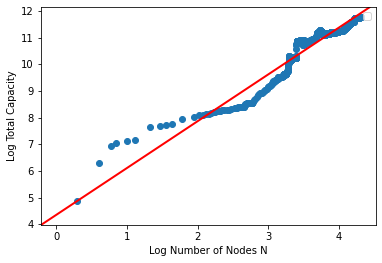

In [877]:
m=list(Nodedic.values())
n=list(T_capacity.values())

plt.xlabel("Log Number of Nodes N")
plt.ylabel("Log Total Capacity")
plt.scatter(np.log10(m), np.log10(n))


b, a = np.polyfit(np.log10(m), np.log10(n), deg=1)
plt.axline(xy1=(0, a), slope=b, color='r',lw=2)
plt.legend()

plt.show()


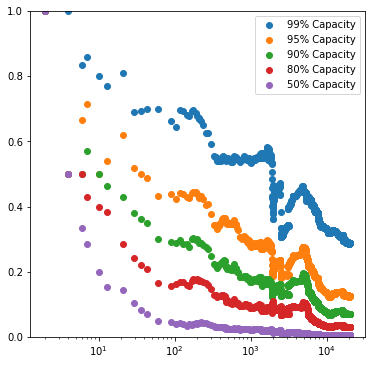

In [878]:
fig = plt.figure( figsize=(6, 6))
x=list(Nodedic.values())
y1=list(capacity_level99.values())
y2=list(capacity_level95.values())
y3=list(capacity_level90.values())
y4=list(capacity_level80.values())
y5=list(capacity_level50.values())


plt.scatter(x, y1,label='99% Capacity')
plt.scatter(x, y2,label='95% Capacity')
plt.scatter(x, y3,label='90% Capacity')
plt.scatter(x, y4,label='80% Capacity')
plt.scatter(x, y5,label='50% Capacity')
plt.xscale("log")
plt.ylim(0,1)

plt.xlabel("Number of Nodes N")
plt.ylabel("Fraction of Top Nodes")

plt.legend(loc='upper right')

In [879]:
# Gini coefficient
def Gini_coefficient(C):
    N=len(C)
    numerator=0
    divider=0
    for i in range(N):
        for j in range(N):
            numerator=numerator+abs(C[i]-C[j])
        divider=divider+C[i]
    ind=numerator/(divider*2*N)
    
    return ind

In [881]:
# run for calculation
capacity_gini={}

for dates in tqdm(dict(Capacity).keys()):
    capacitydic=dict(Capacity[dates])
    capacity_gini[dates]=Gini_coefficient(list(capacitydic.values()))

100%|███████████████████████████████████████████████████████████████████████████| 1456/1456 [3:59:21<00:00,  9.86s/it]


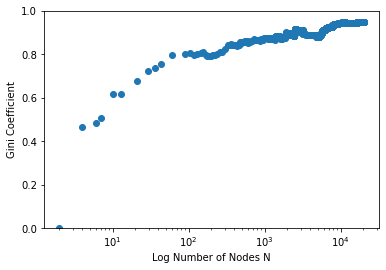

In [882]:
m=list(Nodedic.values())
n=list(capacity_gini.values())

plt.xlabel("Log Number of Nodes N")
plt.ylabel("Gini Coefficient")
plt.scatter(m, n)
plt.xscale("log")
plt.ylim(0,1)

plt.show()

In [ ]:
# run for calculation
degree_gini={}
clossness_gini={}
betweeness_gini={}
eigenvector_gini={}

for i in tqdm(Network_list):
    degree_gini[i]=Gini_coefficient(deg[i])
    betweeness_gini[i]=Gini_coefficient(bet[i])
    clossness_gini[i]=Gini_coefficient(clos[i])
    eigenvector_gini[i]=Gini_coefficient(eig[i])

In [ ]:
def Pic_gini(DIC,label,n1,n2):
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(20, 4))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            x, y = zip(*DIC[n]) 
            ax[j].scatter(x,y)
            ax[j].set_xlabel('Time')
            ax[j].set_ylabel(label[n])
            ax[j].set_ylim(0,1)
            ax[j].xaxis.set_major_locator(ticker.MultipleLocator(3))
            
    plt.show()
    

In [ ]:
lists1 = sorted(degree_gini.items()) # sorted by key, return a list of tuples
lists2 = sorted(clossness_gini.items()) # sorted by key, return a list of tuples
lists3 = sorted(betweeness_gini.items()) # sorted by key, return a list of tuples
lists4 = sorted(eigenvector_gini.items()) # sorted by key, return a list of tuples
gini_list=[lists1,lists2,lists3,lists4]

Pic_gini(gini_list,['Degree','Closeness','Betweeness','Eigenvector'],1,4)

In [ ]:
def Pic_gini_node(DIC,noden,label,n1,n2):
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(20, 4))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            x, y = zip(*DIC[n]) 
            ax[j].scatter(noden,list(y))
            ax[j].set_xlabel('Time')
            ax[j].set_ylim(0,1)
            ax[j].set_ylabel(label[n])
            ax[j].set_xscale("log")
            #ax[j].xaxis.set_major_locator(ticker.MultipleLocator(3))
            
    plt.show()

In [ ]:
noden=[2,
104,
506,
1000,
2250,
3302,
6345,
8641,
11922,
15659,
19479]

In [ ]:
Pic_gini_node(gini_list,noden,['Degree','Closeness','Betweeness','Eigenvector'],1,4)